#### 这个文章要好算一些，需要的公式如下
$$ 2^{-7/2}\pi^{-1}(\frac{\hbar^2}{2m})^{3/2}\sqrt{-E}=\frac{1}{U_p-\frac{g_p^2}{\gamma_p-E}} $$
其中
$$ U_p=\frac{4\pi\hbar^2 a_{bg}}{m}$$
$$ g_p^2=\frac{4\pi\hbar^2 a_{bg}\Delta B\mu_{co}}{m}$$
$$ \gamma_p=\mu_{co}(B-B_0)$$

#### 值得注意的是E以费米能为单位
$$ E_F=\frac{\hbar^2(3\pi^2n)^{2/3}}{2m}$$

#### 算的是Li6，数据如下
The parameters for the 6Li atoms are

$$ a_{bg} = −1405a_0 $$
$$ ∆B = −300G $$
$$ µco ∼ 2µB$$

where a0 is the Bohr radius and µB is the Bohr magnetic moment. 

#### 需要的数据如下

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.integrate import quad
from scipy.misc import derivative
from scipy import optimize
from scipy.optimize import root;

In [2]:
#用到的科学常数
Bohr_mag=9.274e-24
Bohr_radius=0.529e-10
u=1.66054e-27
hbar=1.0545718e-34

#输入参数
abg=-1405*Bohr_radius
delta_B=-300e-4
mu_co=2*Bohr_mag
m=6*u
n=2.9e19

#求解问题的中间变量
Up=4*np.pi*hbar**2*abg/m
gp2=Up*delta_B*mu_co
E0=hbar**2*(3*np.pi**2*n)**(2/3)/2/m

#定义求解函数
def solv(E):
    return 2**(-7/2)/np.pi*(hbar**2/2/m)**(-1.5)*np.sqrt(-E*E0)-1/(Up-gp2/(mu_co*B*1e-4-E*E0))
#                                                                       上面这个B应该是B-B0

In [3]:
#定义求解区间
x4=np.arange(-1000,-100,0.1)
x4=x4[::-1]
#print(x4)
Bound_sta=[]
chu=-1
for B in x4:
    solution=optimize.fsolve(solv, chu, xtol=1e-20)
    chu=solution[0]
    Bound_sta.append(solution[0])

/root/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/root/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:175: RuntimeWarning: xtol=0.000000 is too small, no further improvement in the approximate
  solution is possible.
  warnings.warn(msg, RuntimeWarning)


In [4]:
#?print(Bound_sta)

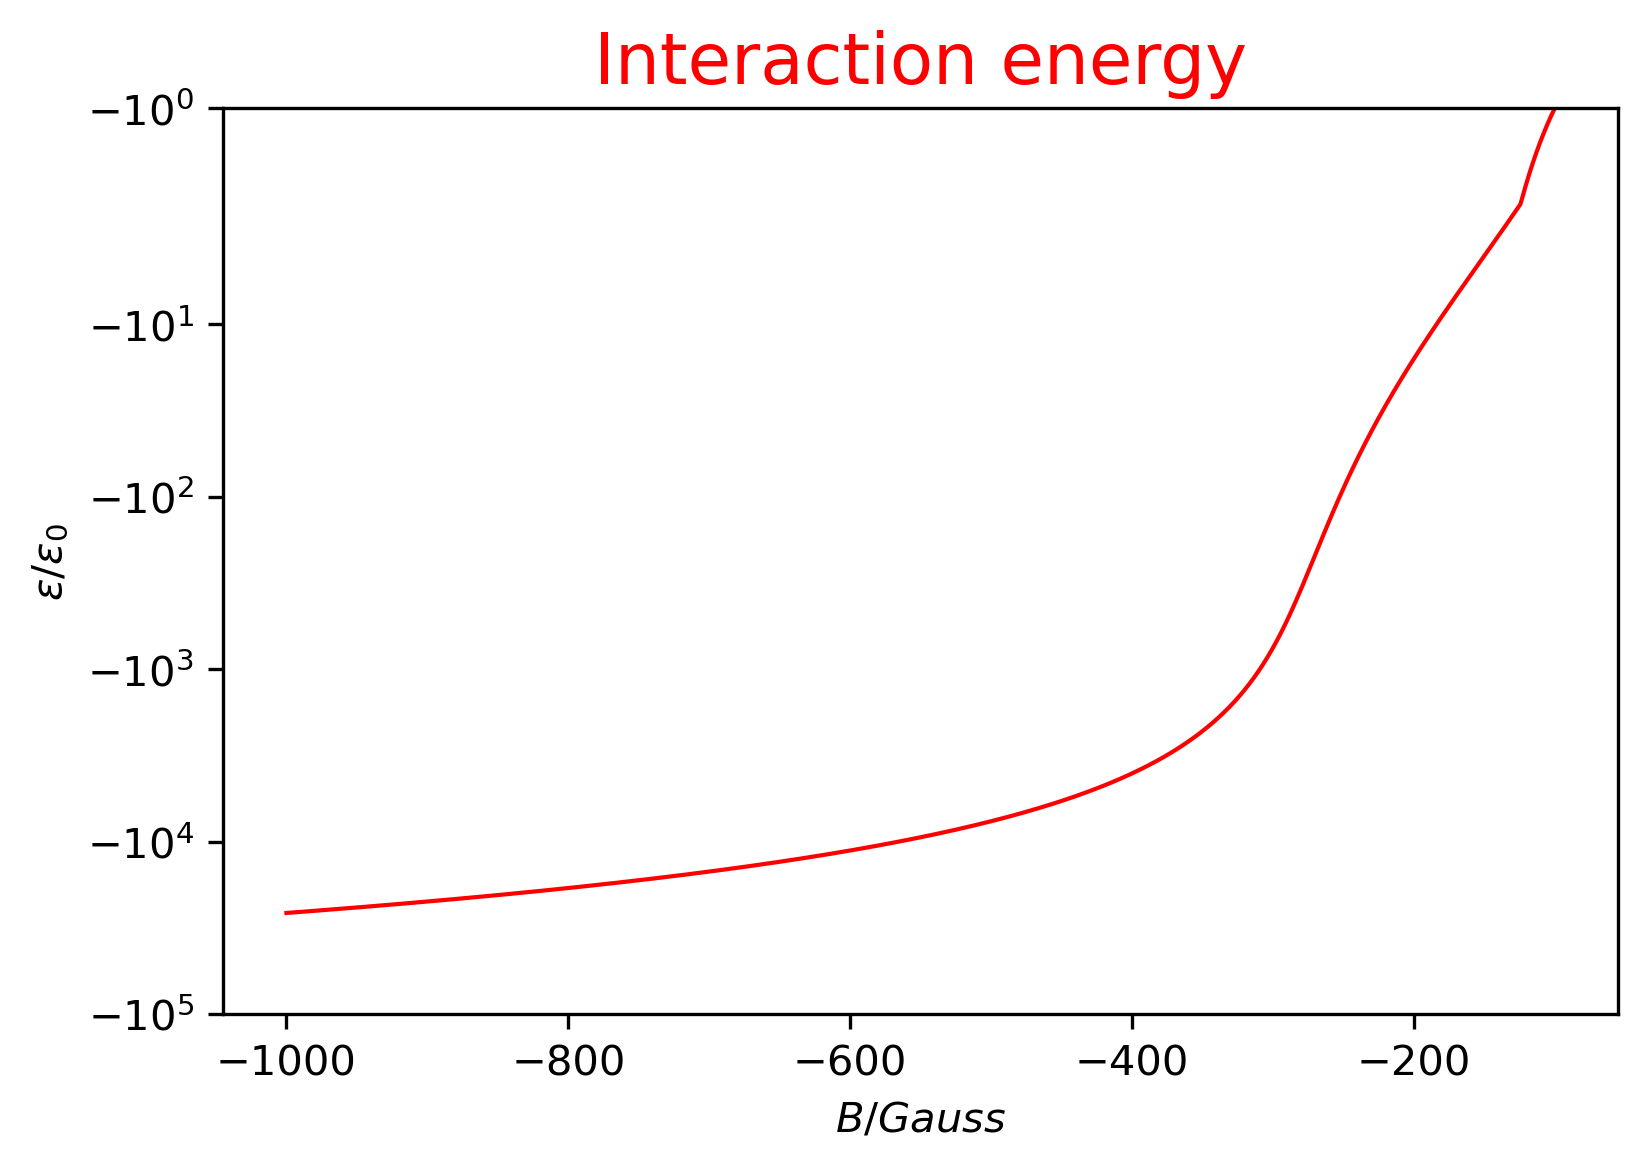

In [5]:
#下面是画图代码
plt.figure(num=2,dpi=300)
plt.plot(x4,Bound_sta,color='r',linewidth=1.0,linestyle='-')

ax=plt.gca()
plt.xlabel(r'$B/Gauss$')
plt.ylabel(r'$\epsilon/\epsilon_0$')
plt.ylim(-100000,-1)
plt.yscale('symlog')
#plt.legend(handles=[l0,l1,l2],labels=['zero-order','second-order','accurate but with a upper limit'],loc='upper right',fontsize='small')
ax.set_title('Interaction energy',fontsize=17,color='r')
plt.show()